In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
#from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import datetime

In [2]:
wd = os.getcwd()
print("Working Directory:",wd)
# Create a folder for upcoming results
output_folder_path = os.path.join(wd, "Results")
if not os.path.exists(output_folder_path): os.mkdir(output_folder_path)
import os
wd = os.getcwd()
wd

Working Directory: C:\Users\user\Python\Capstone\Data


'C:\\Users\\user\\Python\\Capstone\\Data'


# Prepare combine datasets
- Used pd.read_csv to import all datasets
- Use for loop to store dataframes in a list
- Join data frames using pd.concat
- Save the joined data frame as a csv file

In [3]:
# Join 112 data sets 
list_of_detaframes = []
for num in range(0,112):
    df_daily = pd.read_csv("daily_dataset/block_"+str(num)+".csv")
    df_selection = df_daily[df_daily["energy_count"]==48][['day','LCLid','energy_sum']]
    list_of_detaframes.append(df_selection)

len(list_of_detaframes)

112

In [4]:
df_all_daily_dataset = pd.concat(list_of_detaframes)
df_all_daily_dataset = df_all_daily_dataset.reset_index(drop = True)
df_all_daily_dataset["day"]=pd.to_datetime(df_all_daily_dataset["day"], format='%Y-%m-%d') # string type is changed to date type
print(df_all_daily_dataset.shape) # note without the df_daily["energy_count"]==48 condition the shape was (3510433, 3)
df_all_daily_dataset.head()

(3469352, 3)


,day,LCLid,energy_sum
0,2012-10-13,MAC000002,11.087
1,2012-10-14,MAC000002,13.223
2,2012-10-15,MAC000002,10.257
3,2012-10-16,MAC000002,9.769
4,2012-10-17,MAC000002,10.885


In [5]:
df_all_daily_dataset.to_csv("daily_dataset/daily_dataset_all_blocks.csv")

In [6]:
df_detailsacorn=pd.read_csv("acorn_details.csv",encoding = "ISO-8859-1")
df_detailsacorn.head()


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


## Read the combined daily_dataset

In [7]:
import pandas as pd
df_all_daily_dataset = pd.read_csv("daily_dataset/daily_dataset_all_blocks.csv", index_col='Unnamed: 0')
print(df_all_daily_dataset.shape)
df_all_daily_dataset.head()

(3469352, 3)


,day,LCLid,energy_sum
0,2012-10-13,MAC000002,11.087
1,2012-10-14,MAC000002,13.223
2,2012-10-15,MAC000002,10.257
3,2012-10-16,MAC000002,9.769
4,2012-10-17,MAC000002,10.885


In [8]:
df_all_daily_dataset['day']

0          2012-10-13
1          2012-10-14
2          2012-10-15
3          2012-10-16
4          2012-10-17
              ...    
3469347    2014-02-23
3469348    2014-02-24
3469349    2014-02-25
3469350    2014-02-26
3469351    2014-02-27
Name: day, Length: 3469352, dtype: object

In [9]:
df_all_daily_dataset['day'] = pd.to_datetime(df_all_daily_dataset['day'], errors='coerce')
df_all_daily_dataset['day']

0         2012-10-13
1         2012-10-14
2         2012-10-15
3         2012-10-16
4         2012-10-17
             ...    
3469347   2014-02-23
3469348   2014-02-24
3469349   2014-02-25
3469350   2014-02-26
3469351   2014-02-27
Name: day, Length: 3469352, dtype: datetime64[ns]

In [10]:
df_detailsacorn=pd.read_csv("acorn_details.csv",encoding = "ISO-8859-1")
df_detailsacorn.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [11]:
df_bankholidays=pd.read_csv("uk_bank_holidays.csv",encoding = "ISO-8859-1")
df_bankholidays.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [12]:

df_weatherdaily=pd.read_csv("weather_daily_darksky.csv",encoding = "ISO-8859-1")
df_weatherdaily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


## Exploration of the data set

In [13]:
housecount = df_all_daily_dataset.groupby(["day"])[['LCLid']].nunique()
print("Number of available days:", len(housecount))
housecount.head()

Number of available days: 827


,LCLid
day,
2011-11-24,13
2011-11-25,25
2011-11-26,32
2011-11-27,41
2011-11-28,41


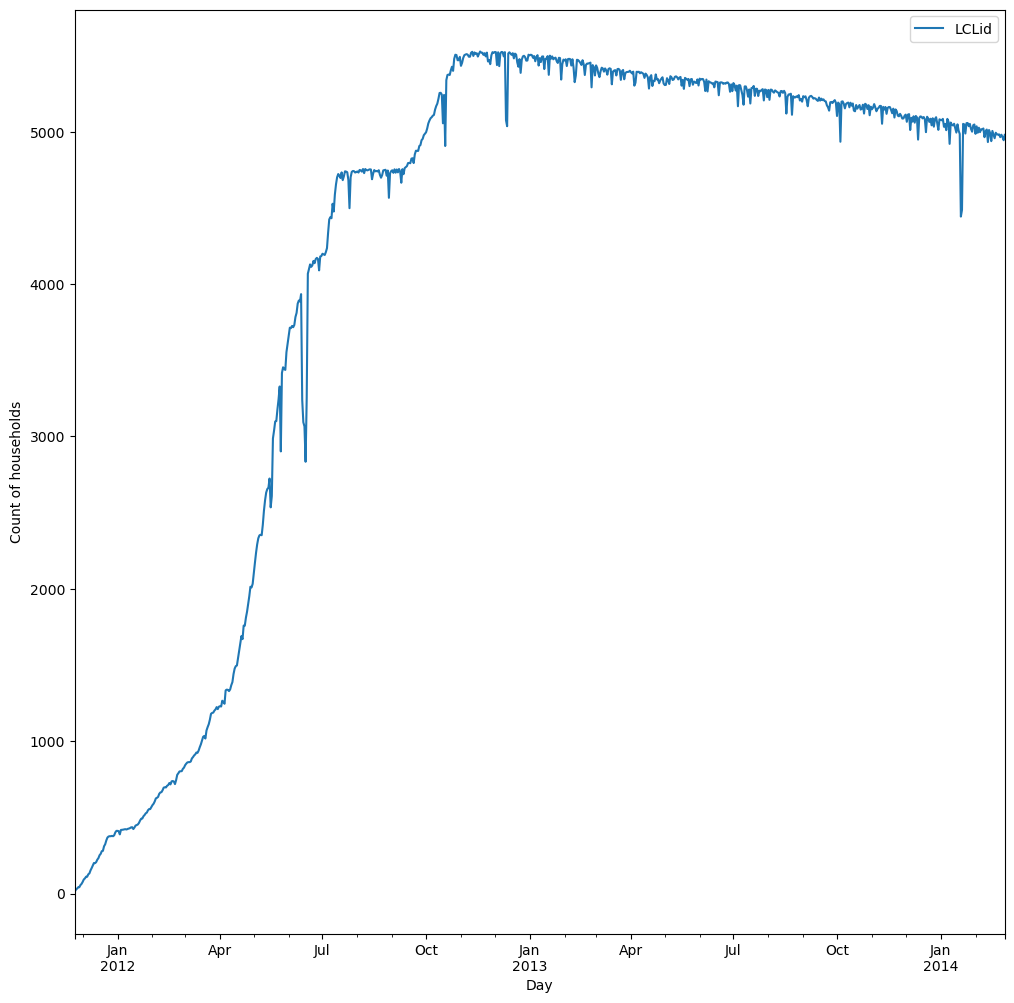

In [15]:
fig,ax=plt.subplots(figsize=(12,12))
housecount.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
##fig.tight_layout()
plt.show()
ax.figure.savefig("Results/count_householdday.png")


### Notes: There is clearly an increase of the number of available households since the start of the study in end 2011, the peak is reach in 2013. A good period for our study couldbe 2013 (and i choose this one).

In [20]:
df_all_daily_dataset['day'] = pd.to_datetime(df_all_daily_dataset['day'], errors='coerce')

In [21]:
start_date=datetime.datetime(year=2013,month=1,day=1)

In [22]:
start_date

datetime.datetime(2013, 1, 1, 0, 0)

In [23]:
end_date=datetime.datetime(year=2014, month=1,day=1)

In [24]:
end_date

datetime.datetime(2014, 1, 1, 0, 0)

### Explore daily average energy consumption 2013

In [25]:
df_all_daily_dataset.columns

Index(['day', 'LCLid', 'energy_sum'], dtype='object')

In [26]:
df_dailyselection = df_all_daily_dataset[['energy_sum', 'day']]
df_dailyselection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3469352 entries, 0 to 3469351
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   energy_sum  float64       
 1   day         datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 79.4 MB


In [28]:
condition=(df_dailyselection['day']>=start_date) &  (df_dailyselection['day']<end_date)
df_dailyselection_zoom=df_dailyselection[condition]

In [30]:
df_dailyselection_zoom.set_index("day")

,energy_sum
day,
2013-01-01,10.800
2013-01-02,13.300
2013-01-03,10.074
2013-01-04,9.857
2013-01-05,11.171
...,...
2013-12-27,0.691
2013-12-28,0.664
2013-12-29,0.655


In [36]:
df_generalheatmap = df_dailyselection_zoom.groupby(["day"]).agg({"energy_sum":"mean"})

In [37]:
df_generalheatmap

,energy_sum
day,
2013-01-01,11.848330
2013-01-02,12.017318
2013-01-03,11.401671
2013-01-04,11.434708
2013-01-05,11.715724
...,...
2013-12-27,11.679562
2013-12-28,11.384946
2013-12-29,11.997864


In [38]:
df_generalheatmap = df_generalheatmap.rename(columns={"energy_sum": "avg_energy"})
df_generalheatmap

,avg_energy
day,
2013-01-01,11.848330
2013-01-02,12.017318
2013-01-03,11.401671
2013-01-04,11.434708
2013-01-05,11.715724
...,...
2013-12-27,11.679562
2013-12-28,11.384946
2013-12-29,11.997864


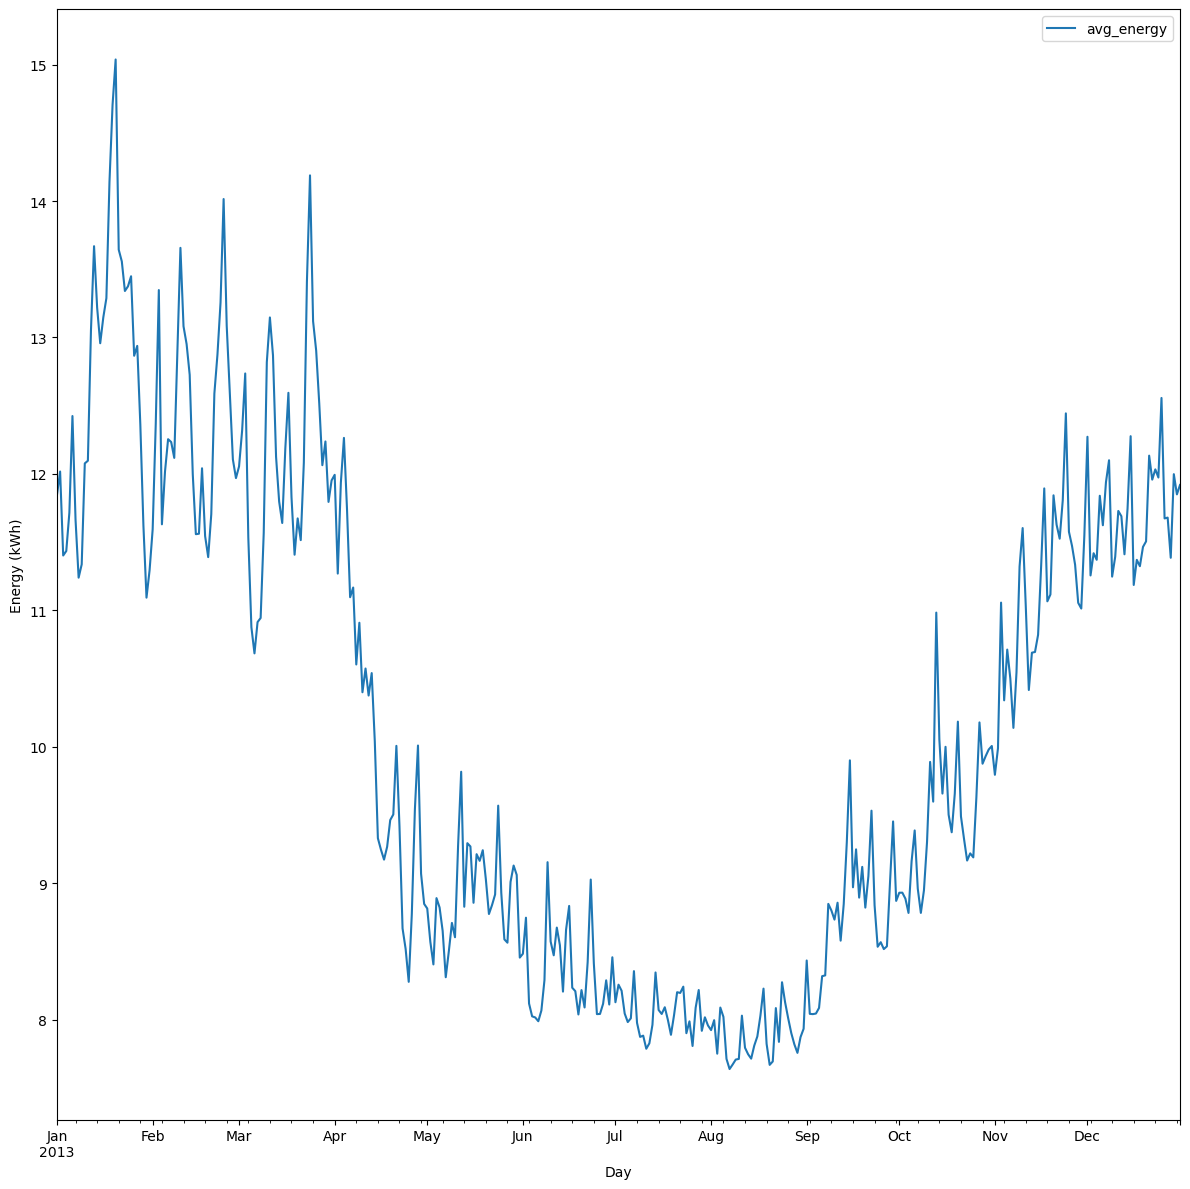

In [40]:
folder_savepicture = "Results"
fig,ax=plt.subplots(figsize=(12,12))
df_generalheatmap.plot(ax=ax,kind="line",use_index=True)
plt.xlabel("Day")
plt.ylabel("Energy (kWh)")
fig.tight_layout()
plt.show()
ax.figure.savefig("Results/timeseries_sumall.png")
